# LDA Clustering

## Importing of Libraries
Run this as a seperate cell in order to reduce latency

In [11]:
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import gensim
import nltk
import re
import os

## Pre-Processing
Loading of training data, removing of stop words from dataset and stemming as well. Additionally, will be converting those words into vector to fit it into the model

In [12]:
# Gets list of stop words and stemmer object
stop_list = nltk.corpus.stopwords.words("english")
stemmer = nltk.stem.porter.PorterStemmer()

In [13]:
# Converts text files into a corpus
train_corpus = nltk.corpus.PlaintextCorpusReader("./TrainTest_Transcripts/Train/", ".+\.txt")

In [14]:
# Converts corpus into a list of documents
fids = train_corpus.fileids()
docs1 = []
for fid in fids:
    doc_raw = train_corpus.raw(fid)
    doc = nltk.word_tokenize(doc_raw)
    docs1.append(doc)
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
train_docs = [[stemmer.stem(w) for w in doc] for doc in docs4]

In [15]:
# Creates a dictionary for bag-of-words purposes
train_dictionary = gensim.corpora.Dictionary(train_docs)

# Convert the list of documents into vectors
train_vecs = [train_dictionary.doc2bow(doc) for doc in train_docs]

## Determining optimal K 
Will be using the coherence score (avereage distance between words) to determine the optimal K for the LDA mallet model.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

In [16]:
# Importing of external library; mallet
# os.environ.update({'MALLET_HOME':r'./libs/mallet-2.0.8/'})
mallet_path = r'/Library/NLTK/mallet/mallet-2.0.8/bin/mallet'

In [7]:
start_time = datetime.datetime.now()

In [8]:
# RUN 1
model_list_1 = []
coherence_values_1 = []
model_topics_1 = []

for num_topics in range(2, 30, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_1.append(num_topics)
    model_list_1.append(train_ldaMallet)
    coherence_values_1.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 2, Score: 0.2581912664404484
#Topics: 4, Score: 0.29497919069894873
#Topics: 6, Score: 0.351724017969341
#Topics: 8, Score: 0.3567327904385763
#Topics: 10, Score: 0.37204398698380675
#Topics: 12, Score: 0.3808281901153752
#Topics: 14, Score: 0.400475071727635
#Topics: 16, Score: 0.4059106993400384
#Topics: 18, Score: 0.4046843835584626
#Topics: 20, Score: 0.40893539950009467
#Topics: 22, Score: 0.4292232548865163
#Topics: 24, Score: 0.4317817803313601
#Topics: 26, Score: 0.4311943428675956
#Topics: 28, Score: 0.4225681866119285


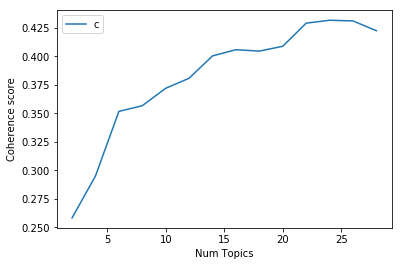

In [9]:
# Plotting of graph for RUN 1
limit=30; start=2; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [10]:
# RUN 2
model_list_2 = []
coherence_values_2 = []
model_topics_2 = []

for num_topics in range(30, 60, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_2.append(num_topics)
    model_list_2.append(train_ldaMallet)
    coherence_values_2.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 30, Score: 0.43620580182131957
#Topics: 32, Score: 0.42798788238186897
#Topics: 34, Score: 0.43600280789436824
#Topics: 36, Score: 0.4364645614771019
#Topics: 38, Score: 0.4355284488174965
#Topics: 40, Score: 0.435707561732252
#Topics: 42, Score: 0.4417337921222379
#Topics: 44, Score: 0.4290503150197432
#Topics: 46, Score: 0.4444787179528973
#Topics: 48, Score: 0.4474373007820181
#Topics: 50, Score: 0.4430554840932544
#Topics: 52, Score: 0.441044517234399
#Topics: 54, Score: 0.4320460927371197
#Topics: 56, Score: 0.4303023363619961
#Topics: 58, Score: 0.43863872449571556


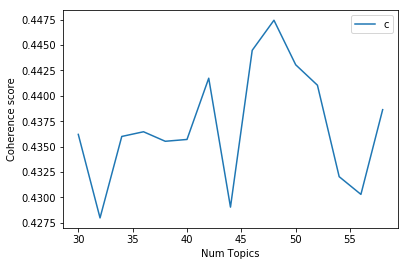

In [11]:
# Plotting of graph for RUN 2
limit=60; start=30; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
# RUN 3
model_list_3 = []
coherence_values_3 = []
model_topics_3 = []

for num_topics in range(60, 90, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_3.append(num_topics)
    model_list_3.append(train_ldaMallet)
    coherence_values_3.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 60, Score: 0.4391745181023914
#Topics: 62, Score: 0.43457606288378703
#Topics: 64, Score: 0.441299461748609
#Topics: 66, Score: 0.43879564601041976
#Topics: 68, Score: 0.43613562340753614
#Topics: 70, Score: 0.43194062442287845
#Topics: 72, Score: 0.4444285123449199
#Topics: 74, Score: 0.43109023102632005
#Topics: 76, Score: 0.4397302598698165
#Topics: 78, Score: 0.4372850003029967
#Topics: 80, Score: 0.42764518906259247
#Topics: 82, Score: 0.43500080003123537
#Topics: 84, Score: 0.4311877027724106
#Topics: 86, Score: 0.43058145261479963
#Topics: 88, Score: 0.4211810005624079


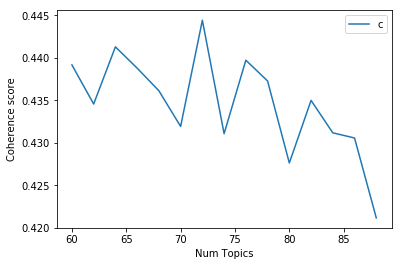

In [13]:
# Plotting of graph for RUN 3
limit=90; start=60; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [14]:
# RUN 4
model_list_4 = []
coherence_values_4 = []
model_topics_4 = []

for num_topics in range(90, 120, 2):
    train_ldaMallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=num_topics, id2word=train_dictionary)
    coherencemodel = CoherenceModel(model=train_ldaMallet, texts=train_docs, dictionary=train_dictionary, coherence='c_v')
    model_topics_4.append(num_topics)
    model_list_4.append(train_ldaMallet)
    coherence_values_4.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + ", Score: " + str(coherencemodel.get_coherence()))

#Topics: 90, Score: 0.4335538213880004
#Topics: 92, Score: 0.42913772216454343
#Topics: 94, Score: 0.4258351866777491
#Topics: 96, Score: 0.43232648869722
#Topics: 98, Score: 0.4256332169595269
#Topics: 100, Score: 0.4271227180857116
#Topics: 102, Score: 0.42752600614407527
#Topics: 104, Score: 0.4256840923724497
#Topics: 106, Score: 0.4221675563238882
#Topics: 108, Score: 0.42179835886806205
#Topics: 110, Score: 0.4226220217387769
#Topics: 112, Score: 0.4216938409484085
#Topics: 114, Score: 0.4235916327505747
#Topics: 116, Score: 0.41412608503403076
#Topics: 118, Score: 0.425592937050291


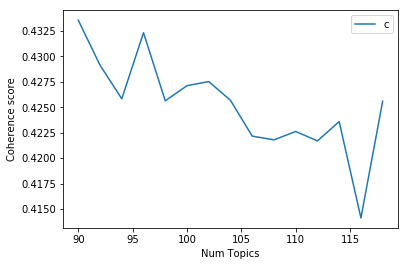

In [15]:
# Plotting of graph for RUN 4
limit=120; start=90; step=2;

x = range(start, limit, step)

plt.plot(x, coherence_values_4)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
end_time = datetime.datetime.now()

In [17]:
print("Start time: ", start_time)
print("End time: ", end_time)

Start time:  2020-04-01 00:18:23.857937
End time:  2020-04-01 05:15:31.729106


### Collating model and coherence score
Collating to plot out the entire series from K 2 to 120 to determine optimal K

In [18]:
collated_model_list = model_list_1 + model_list_2 + model_list_3 + model_list_4
collated_coherence_values = coherence_values_1 + coherence_values_2 + coherence_values_3 + coherence_values_4
colated_model_topics = model_topics_1 + model_topics_2 + model_topics_3 + model_topics_4

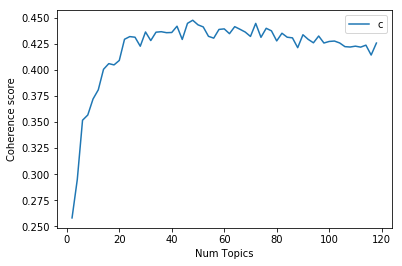

In [19]:
# Plotting of entire series
limit=120; start=2; step=2;

x = range(start, limit, step)

plt.plot(x, collated_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Retrieve based on highest coherence value
highest_coherence_value = max(collated_coherence_values)
index = collated_coherence_values.index(highest_coherence_value)

# Retrieve the model and the no. of topics with the highest coherence value
highest_lda_model = collated_model_list[index]
highest_lda_topics = colated_model_topics[index]

In [25]:
print("Highest coherence score:", highest_coherence_value)
print("Number of topics with highest coherence score:", highest_lda_topics)

Highest coherence score: 0.4474373007820181
Number of topics with highest coherence score: 48


In [30]:
vecTop = highest_lda_model.show_topics()
for i in range(0, 10):
    print(vecTop[i])

(31, '0.052*"book" + 0.049*"word" + 0.039*"languag" + 0.035*"read" + 0.033*"write" + 0.020*"stori" + 0.015*"english" + 0.011*"translat" + 0.011*"learn" + 0.010*"speak"')
(13, '0.053*"anim" + 0.021*"human" + 0.015*"dog" + 0.012*"laughter" + 0.011*"bear" + 0.010*"realli" + 0.010*"male" + 0.010*"babi" + 0.010*"creatur" + 0.009*"monkey"')
(10, '0.114*"peopl" + 0.020*"social" + 0.017*"person" + 0.017*"differ" + 0.016*"group" + 0.015*"studi" + 0.014*"kind" + 0.013*"good" + 0.012*"behavior" + 0.011*"give"')
(18, '0.032*"ocean" + 0.031*"fish" + 0.019*"water" + 0.016*"sea" + 0.013*"coral" + 0.010*"shark" + 0.010*"boat" + 0.009*"year" + 0.009*"time" + 0.009*"place"')
(35, '0.064*"play" + 0.049*"game" + 0.031*"video" + 0.024*"show" + 0.019*"time" + 0.017*"watch" + 0.015*"good" + 0.015*"start" + 0.014*"world" + 0.013*"laughter"')
(36, '0.027*"peopl" + 0.026*"internet" + 0.020*"phone" + 0.015*"onlin" + 0.014*"media" + 0.013*"call" + 0.012*"world" + 0.010*"day" + 0.010*"googl" + 0.010*"web"')
(3, '0

### Save the LDA models
Saving models and coherence list for topics number 2 to 120

In [29]:
models_folder = "./LDA_Models/"

# Saving models
for model_num in range(0, len(collated_model_list)):
    model_name = "train_LDA_" + str(colated_model_topics[model_num])
    collated_model_list[model_num].save(models_folder + model_name)
    print("Saving model:", model_name)

Saving model: train_LDA_2
Saving model: train_LDA_4
Saving model: train_LDA_6
Saving model: train_LDA_8
Saving model: train_LDA_10
Saving model: train_LDA_12
Saving model: train_LDA_14
Saving model: train_LDA_16
Saving model: train_LDA_18
Saving model: train_LDA_20
Saving model: train_LDA_22
Saving model: train_LDA_24
Saving model: train_LDA_26
Saving model: train_LDA_28
Saving model: train_LDA_30
Saving model: train_LDA_32
Saving model: train_LDA_34
Saving model: train_LDA_36
Saving model: train_LDA_38
Saving model: train_LDA_40
Saving model: train_LDA_42
Saving model: train_LDA_44
Saving model: train_LDA_46
Saving model: train_LDA_48
Saving model: train_LDA_50
Saving model: train_LDA_52
Saving model: train_LDA_54
Saving model: train_LDA_56
Saving model: train_LDA_58
Saving model: train_LDA_60
Saving model: train_LDA_62
Saving model: train_LDA_64
Saving model: train_LDA_66
Saving model: train_LDA_68
Saving model: train_LDA_70
Saving model: train_LDA_72
Saving model: train_LDA_74
Savin

In [41]:
# Saving coherence list
file_object = open(models_folder + "coherence_list_2_to_120.txt", "w")

# Write header
file_object.write("No. of Topics, Coherence Score\n")

# Write body
for index in range(0, len(colated_model_topics)):
    line = str(colated_model_topics[index]) + ", " + str(collated_coherence_values[index])
    file_object.write(line + "\n")
    print("Writing Line:", line)
    
file_object.close()

Writing Line: 2, 0.2581912664404484
Writing Line: 4, 0.29497919069894873
Writing Line: 6, 0.351724017969341
Writing Line: 8, 0.3567327904385763
Writing Line: 10, 0.37204398698380675
Writing Line: 12, 0.3808281901153752
Writing Line: 14, 0.400475071727635
Writing Line: 16, 0.4059106993400384
Writing Line: 18, 0.4046843835584626
Writing Line: 20, 0.40893539950009467
Writing Line: 22, 0.4292232548865163
Writing Line: 24, 0.4317817803313601
Writing Line: 26, 0.4311943428675956
Writing Line: 28, 0.4225681866119285
Writing Line: 30, 0.43620580182131957
Writing Line: 32, 0.42798788238186897
Writing Line: 34, 0.43600280789436824
Writing Line: 36, 0.4364645614771019
Writing Line: 38, 0.4355284488174965
Writing Line: 40, 0.435707561732252
Writing Line: 42, 0.4417337921222379
Writing Line: 44, 0.4290503150197432
Writing Line: 46, 0.4444787179528973
Writing Line: 48, 0.4474373007820181
Writing Line: 50, 0.4430554840932544
Writing Line: 52, 0.441044517234399
Writing Line: 54, 0.4320460927371197
Wri

### Finding the most dominant topics
Finding the dominant topics for for each transcript within the training dataset. There are a total of 1872 transcripts with a distribution of 48 topics

In [19]:
train_lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train_vecs, num_topics=48, id2word=train_dictionary)

In [20]:
def format_topics_sentences(ldamodel, corpus, data):
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
                
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [230]:
no_of_topics = 48

# Models are in increment of 2, from 2 to 120. Choose and even number model during loading
train_LDA = gensim.models.wrappers.LdaMallet.load("./LDA_Models/train_LDA_" + str(no_of_topics))

In [21]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=train_lda_mallet, corpus=train_vecs, data=train_docs)

In [22]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Transcript_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Transcript']

# Find the true transcript number from the entire corpus
transcript_no_hash = {}
for index in df_dominant_topic["Transcript_No"]:
    transcript_no = fids[index].split(".")[0].split("_")[1]
    transcript_no_hash[index] = transcript_no

# Replace data in "index" column
df_dominant_topic["Transcript_No"].replace(transcript_no_hash, inplace=True)

# Show
df_dominant_topic

,Transcript_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Transcript
0,1,40.0,0.1545,"water, chang, climat, energi, carbon, percent,...","[thank, much, chri, truli, great, honor, oppor..."
1,100,41.0,0.1598,"brain, neuron, sleep, mental, activ, studi, mi...","[two, thing, design, mobil, comput, studi, bra..."
2,1001,34.0,0.4642,"fli, bodi, leg, applaus, feet, run, foot, flig...","[music, music, mobi, grand, canyon, narrat, ma..."
3,1003,15.0,0.5071,"cell, dna, gene, bodi, genet, human, organ, bi...","[ever, want, stay, young, littl, longer, put, ..."
4,1004,10.0,0.1134,"univers, star, space, galaxi, hole, physic, ti...","[like, apolog, first, form, powerpoint, presen..."
5,1005,14.0,0.2847,"planet, earth, life, year, mar, time, human, e...","[want, talk, someth, kind, big, start, million..."
6,1006,24.0,0.2527,"robot, human, anim, dog, babi, monkey, actual,...","[let, introduc, rezero, littl, fellow, develop..."
7,1007,46.0,0.2421,"stori, film, man, time, happen, memori, live, ...","[ladi, gentlemen, gather, around, would, love,..."
8,1009,28.0,0.1688,"world, life, creat, idea, futur, great, live, ...","[life, book, author, would, want, stori, go, q..."
9,101,44.0,0.4071,"ocean, fish, sea, water, ice, year, coral, tim...","[like, start, tonight, someth, complet, differ..."


In [25]:
vecTop = train_lda_mallet.show_topics(num_topics=48)
for i in range(0, 48):
    print(vecTop[i])

(0, '0.087*"design" + 0.067*"build" + 0.021*"work" + 0.018*"creat" + 0.018*"space" + 0.015*"idea" + 0.015*"project" + 0.014*"architectur" + 0.013*"make" + 0.013*"kind"')
(1, '0.081*"thing" + 0.077*"realli" + 0.058*"actual" + 0.037*"kind" + 0.036*"lot" + 0.034*"littl" + 0.031*"someth" + 0.023*"work" + 0.021*"sort" + 0.018*"bit"')
(2, '0.033*"god" + 0.017*"compass" + 0.015*"religion" + 0.014*"call" + 0.014*"world" + 0.013*"man" + 0.012*"death" + 0.011*"everi" + 0.011*"religi" + 0.011*"human"')
(3, '0.027*"internet" + 0.025*"peopl" + 0.017*"onlin" + 0.017*"media" + 0.015*"phone" + 0.011*"actual" + 0.011*"share" + 0.010*"world" + 0.009*"happen" + 0.009*"open"')
(4, '0.037*"war" + 0.013*"world" + 0.012*"countri" + 0.012*"peac" + 0.012*"refuge" + 0.011*"kill" + 0.010*"conflict" + 0.010*"arab" + 0.009*"attack" + 0.009*"forc"')
(5, '0.045*"feel" + 0.032*"love" + 0.028*"happi" + 0.026*"peopl" + 0.017*"good" + 0.015*"experi" + 0.015*"make" + 0.014*"emot" + 0.014*"laughter" + 0.014*"choic"')
(6, 

In [91]:
df_dominant_topic.loc[df_dominant_topic["Dominant_Topic"] == 5.0]

,Transcript_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Transcript
25,1027,5.0,0.2824,"feel, love, happi, peopl, good, experi, make, ...","[rememb, stori, odysseu, siren, high, school, ..."
38,1042,5.0,0.1791,"feel, love, happi, peopl, good, experi, make, ...","[know, mani, choic, make, typic, day, know, ma..."
229,1268,5.0,0.2702,"feel, love, happi, peopl, good, experi, make, ...","[peopl, want, lot, thing, life, think, anyth, ..."
266,1310,5.0,0.2007,"feel, love, happi, peopl, good, experi, make, ...","[live, incred, busi, world, pace, life, often,..."
285,1332,5.0,0.2722,"feel, love, happi, peopl, good, experi, make, ...","[good, sex, often, fade, even, coupl, continu,..."
321,1370,5.0,0.2265,"feel, love, happi, peopl, good, experi, make, ...","[want, talk, littl, bit, today, labor, think, ..."
370,1428,5.0,0.3285,"feel, love, happi, peopl, good, experi, make, ...","[go, talk, design, humor, sort, interest, thin..."
425,149,5.0,0.2302,"feel, love, happi, peopl, good, experi, make, ...","[guess, result, global, find, tin, top, everes..."
461,1535,5.0,0.1980,"feel, love, happi, peopl, good, experi, make, ...","[felt, funer, brain, mourner, fro, kept, tread..."
494,1569,5.0,0.1982,"feel, love, happi, peopl, good, experi, make, ...","[love, hard, term, defin, far, wide, applic, l..."


In [89]:
df_dominant_topic.loc[df_dominant_topic["Dominant_Topic"] == 47.0]["Keywords"].values

array(['imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur, show, eye, color, photograph, camera, face, littl',
       'imag, light, pictur,

## Prediction of Testing Dataset
Predicting the distribution of topics of the testing dataset via the trained LDA model

### Load testing dataset

In [233]:
# Gets list of stop words and stemmer object
stop_list = nltk.corpus.stopwords.words("english")
stemmer = nltk.stem.porter.PorterStemmer()

In [234]:
# Converts text files into a corpus
train_corpus = nltk.corpus.PlaintextCorpusReader("./TrainTest_Transcripts/Test/", ".+\.txt")

In [235]:
# Converts corpus into a list of documents
fids = train_corpus.fileids()
docs1 = []
for fid in fids:
    doc_raw = train_corpus.raw(fid)
    doc = nltk.word_tokenize(doc_raw)
    docs1.append(doc)
docs2 = [[w.lower() for w in doc] for doc in docs1]
docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
test_docs = [[stemmer.stem(w) for w in doc] for doc in docs4]

In [236]:
# Creates a dictionary for bag-of-words purposes
dictionary = gensim.corpora.Dictionary(train_docs)

# Convert the list of documents into vectors
test_vecs = [dictionary.doc2bow(doc) for doc in test_docs]

In [252]:
len(test_vecs[1])

603

### Get dominant topics of testing dataset

In [248]:
df_topic_sents_keywords_test = format_topics_sentences(ldamodel=train_LDA, corpus=test_vecs, data=test_docs)

# Format
df_dominant_topic_test = df_topic_sents_keywords_test.reset_index()
df_dominant_topic_test.columns = ['Transcript_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Transcript']

# Find the true transcript number from the entire corpus
transcript_no_hash_test = {}
for index in df_dominant_topic_test["Transcript_No"]:
    transcript_no_test = fids[index].split(".")[0].split("_")[1]
    transcript_no_hash_test[index] = transcript_no_test

# Replace data in "index" column
df_dominant_topic_test["Transcript_No"].replace(transcript_no_hash_test, inplace=True)

# Show
df_dominant_topic_test

[[(0, 0.11320924724539187), (1, 0.009100504582432297), (2, 0.0059082483781278975), (3, 0.057808155699721996), (4, 0.046583770981361364), (5, 0.004878488312223253), (6, 0.02310524147873546), (7, 0.026297497683039857), (8, 0.09632118216455568), (9, 0.010336216661517872), (10, 0.015073112964679235), (11, 0.08870095767686131), (12, 0.030210585933477505), (13, 0.004981464318813717), (14, 0.01146895273401298), (15, 0.024546905571001962), (16, 0.0033338482133662877), (17, 0.013425496859231804), (18, 0.0024070641540521074), (19, 0.012910616826279484), (20, 0.002304088147461643), (21, 0.006320152404489756), (22, 0.006320152404489756), (23, 0.01146895273401298), (24, 0.00456956029245186), (25, 0.001995160127690249), (26, 0.07037122850375865), (27, 0.0061142003913088275), (28, 0.003024920193594894), (29, 0.019501081248069204), (30, 0.023929049531459176), (31, 0.009100504582432297), (32, 0.008482648542889512), (33, 0.01610287303058388), (34, 0.044318298836371145), (35, 0.011674904747193909), (36, 

,Transcript_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Transcript
0,0,0.0,0.1132,"school, kid, learn, student, children, educ, t...","[good, morn, laughter, great, blown, away, who..."
1,10,12.0,0.1290,"design, creat, work, realli, idea, kind, actua...","[go, take, journey, quickli, explain, wish, go..."
2,1000,37.0,0.1387,"cell, cancer, bodi, blood, actual, diseas, dru...","[offer, posit, associ, professor, medicin, chi..."
3,1002,36.0,0.1824,"peopl, internet, phone, onlin, media, call, wo...","[alway, fascin, comput, technolog, made, app, ..."
4,1008,12.0,0.0982,"design, creat, work, realli, idea, kind, actua...","[like, mani, one, two, billion, peopl, earth, ..."
5,1012,3.0,0.1415,"music, film, stori, movi, song, play, make, au...","[think, sens, usual, think, reason, probabl, e..."
6,1025,19.0,0.2511,"brain, neuron, activ, sleep, memori, control, ...","[talk, wonder, mysteri, consciou, mind, wonder..."
7,1026,19.0,0.2974,"brain, neuron, activ, sleep, memori, control, ...","[studi, brain, process, inform, take, inform, ..."
8,1034,26.0,0.1178,"thing, realli, actual, peopl, littl, lot, kind...","[told, come, tell, stori, like, instead, tell,..."
9,1039,17.0,0.2170,"god, compass, man, religion, world, religi, ca...","[one, common, way, divid, world, believ, relig..."


In [238]:
df_dominant_topic_test.loc[df_dominant_topic_test["Dominant_Topic"] == 0.0]

,Transcript_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Transcript
0,0,0.0,0.1132,"school, kid, learn, student, children, educ, t...","[good, morn, laughter, great, blown, away, who..."
74,1317,0.0,0.1678,"school, kid, learn, student, children, educ, t...","[want, afternoon, someth, littl, differ, sched..."
86,1390,0.0,0.2485,"school, kid, learn, student, children, educ, t...","[everyon, need, coach, matter, whether, basket..."
87,1391,0.0,0.1687,"school, kid, learn, student, children, educ, t...","[teach, chemistri, explos, right, right, explo..."
88,1394,0.0,0.1934,"school, kid, learn, student, children, educ, t...","[littl, nervou, wife, yvonn, said, said, geoff..."
131,163,0.0,0.1159,"school, kid, learn, student, children, educ, t...","[welcom, five, danger, thing, let, children, c..."
141,1691,0.0,0.1582,"school, kid, learn, student, children, educ, t...","[first, children, book, publish, return, old, ..."
177,1842,0.0,0.1361,"school, kid, learn, student, children, educ, t...","[kindergarten, design, made, kindergarten, cir..."
198,193,0.0,0.1354,"school, kid, learn, student, children, educ, t...","[thank, much, everyon, ted, chri, ami, particu..."
227,2083,0.0,0.1545,"school, kid, learn, student, children, educ, t...","[today, go, show, tablet, headset, wear, go, c..."


In [215]:
df_dominant_topic_test.loc[df_dominant_topic_test["Transcript_No"] == "740"]

,Transcript_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Transcript
414,740,7.0,0.075,"patient, health, care, doctor, medic, hospit, ...","[inform, kind, unorigin, trite, idea, new, tec..."
